# NSL-KDD

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
os.chdir("C:\\Users\\Kotani Lab\\Desktop\\ML_senior_project\\ML-Based-Adaptive-Cybersecurity-Incident-Detection\\Code_and_model\\")

# Load the datasets
df2 = pd.read_csv('bestmodel_label_kdd.csv')
df1 = pd.read_csv('bestmodel_mix_kdd.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.drop(['Unnamed: 0'], axis=1, inplace=True)
# Function to preprocess 'attack' column
def preprocess_attack_column(df):
    df['attack'] = df['attack'].apply(lambda x: x.split('_')[0])
    return df

# Preprocess both datasets
df1 = preprocess_attack_column(df1)
df2 = preprocess_attack_column(df2)


In [69]:
df1['accuracy'].min() 

0.9949726187269952

In [70]:
df2['accuracy'].min() 

0.9981873111782478

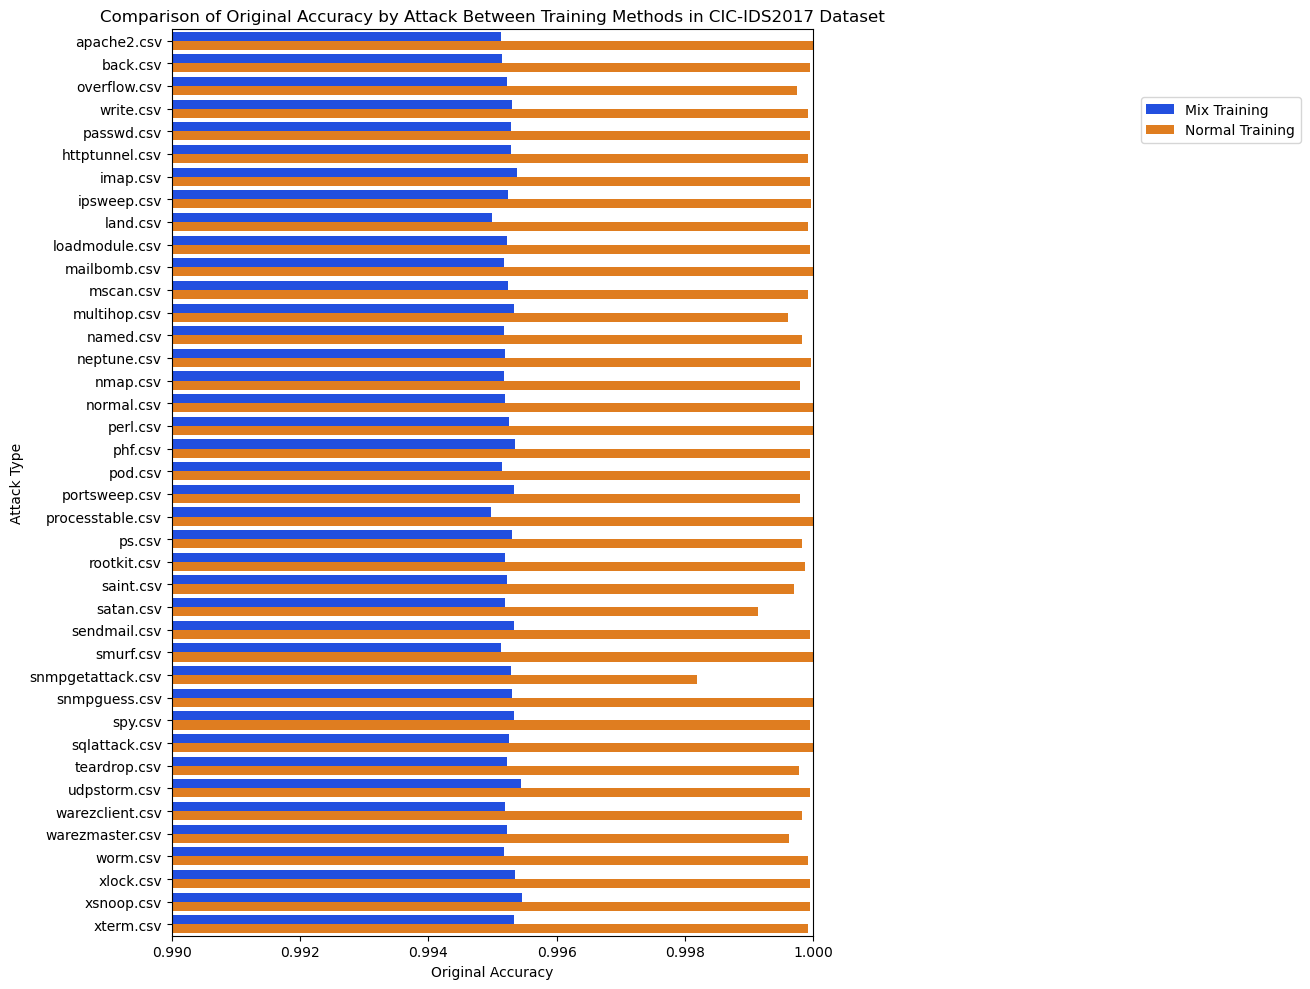

In [73]:
# Plotting the original data with the original scale starting from 0
# Add a column to distinguish between the two datasets


# Create a combined dataset with a new column to distinguish between the two datasets
df1['Dataset'] = 'Mix Training'
df2['Dataset'] = 'Normal Training'

# Combine the datasets
df = pd.concat([df1[['attack', 'accuracy', 'Dataset']], 
                         df2[['attack', 'accuracy', 'Dataset']]])

plt.figure(figsize=(10, 10))
sns.barplot(x='accuracy', y='attack', hue='Dataset', data=df, palette='bright')
plt.title('Comparison of Original Accuracy by Attack Between Training Methods in CIC-IDS2017 Dataset')
plt.xlabel('Original Accuracy')
plt.ylabel('Attack Type')
plt.xlim(0.99, 1.0)  # Adjusting the x-axis to start from 0 to 1.0
# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()  # Adjust layout to fit everything properly
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.9))
plt.show()


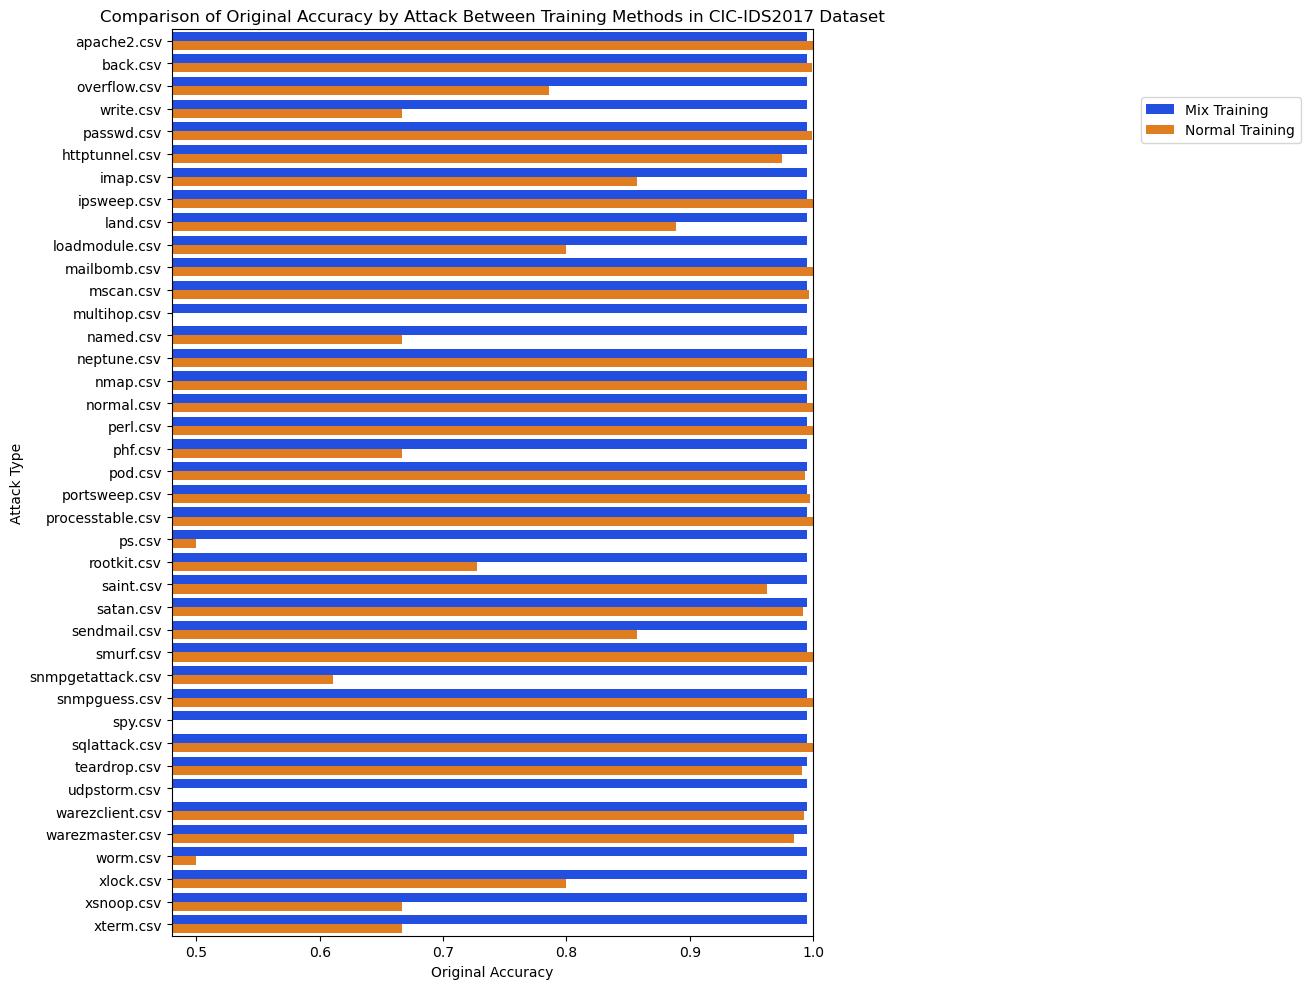

In [79]:
# Plotting the original data with the original scale starting from 0
# Add a column to distinguish between the two datasets


# Create a combined dataset with a new column to distinguish between the two datasets
df1['Dataset'] = 'Mix Training'
df2['Dataset'] = 'Normal Training'

# Combine the datasets
df = pd.concat([df1[['attack', 'f1', 'Dataset']], 
                         df2[['attack', 'f1', 'Dataset']]])

plt.figure(figsize=(10, 10))
sns.barplot(x='f1', y='attack', hue='Dataset', data=df, palette='bright')
plt.title('Comparison of Original Accuracy by Attack Between Training Methods in CIC-IDS2017 Dataset')
plt.xlabel('Original Accuracy')
plt.ylabel('Attack Type')
plt.xlim(0.48, 1.0)  # Adjusting the x-axis to start from 0 to 1.0
# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()  # Adjust layout to fit everything properly
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.9))
plt.show()


In [75]:
df1['f1'].min() 

0.9947705094084138

In [76]:
df2['f1'].min() 

0.0

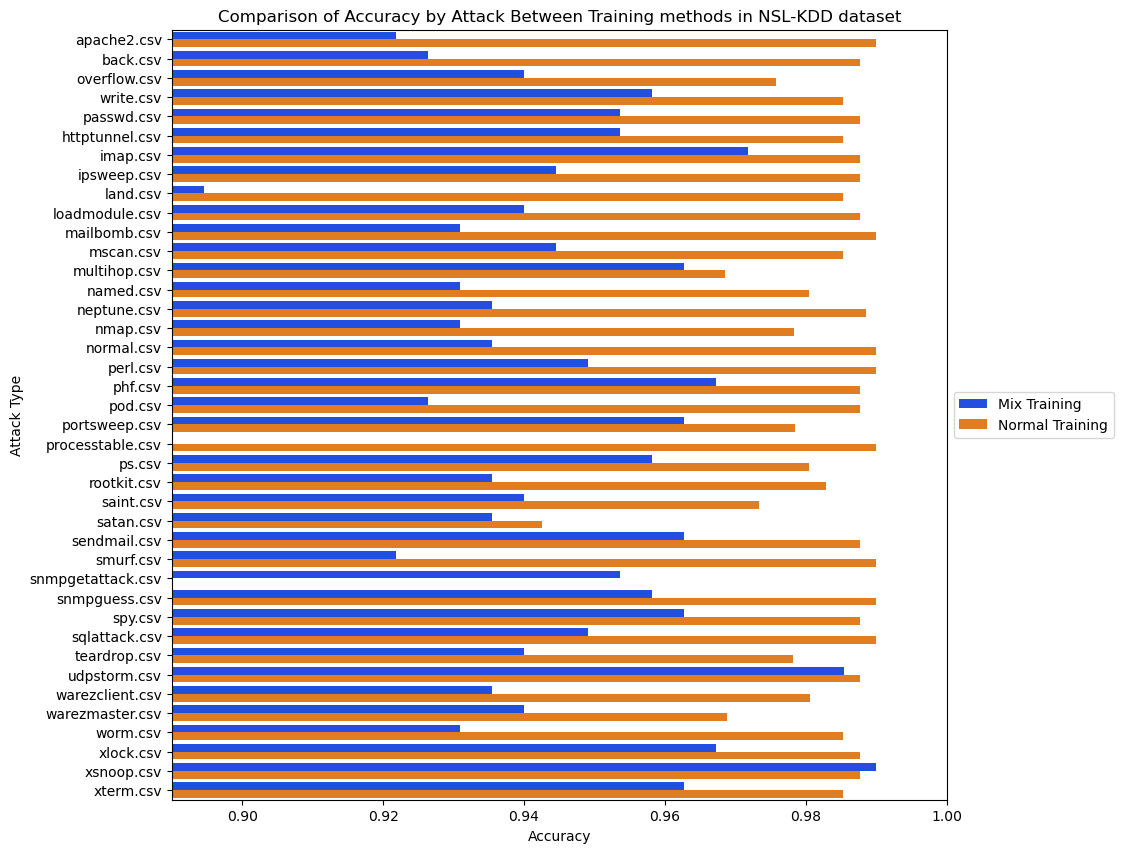

In [43]:
# Function to normalize accuracy values
def normalize_accuracy(df, min_val, max_val):
    """ Normalize the accuracy to fit the new scale [0.9, 1.0] """
    df['normalized_accuracy'] = 0.89 + (df['accuracy'] - min_val) * (0.1 / (max_val - min_val))
    return df

# Find min and max values for normalization
min_val_df1, max_val_df1 = df1['accuracy'].min(), df1['accuracy'].max()
min_val_df2, max_val_df2 = df2['accuracy'].min(), df2['accuracy'].max()

# Normalize the accuracy values for both datasets
df1 = normalize_accuracy(df1, min_val_df1, max_val_df1)
df2 = normalize_accuracy(df2, min_val_df2, max_val_df2)

# Create a combined dataset with a new column to distinguish between the two datasets
df1['Dataset'] = 'Mix Training'
df2['Dataset'] = 'Normal Training'

# Combine the datasets
combined_df = pd.concat([df1[['attack', 'normalized_accuracy', 'Dataset']], 
                         df2[['attack', 'normalized_accuracy', 'Dataset']]])

# Rename columns for clarity in the plot
combined_df.rename(columns={'normalized_accuracy': 'Accuracy', 'Dataset': 'Dataset'}, inplace=True)

# Plotting with Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x='Accuracy', y='attack', hue='Dataset', data=combined_df, palette='bright')
plt.title('Comparison of Accuracy by Attack Between Training methods in NSL-KDD dataset')
plt.xlabel('Accuracy')
plt.ylabel('Attack Type')
plt.xlim(0.89, 1.0)  # Adjusting the x-axis to start from 0.9 to 1.0
# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('./kdd_com.png')
plt.show()

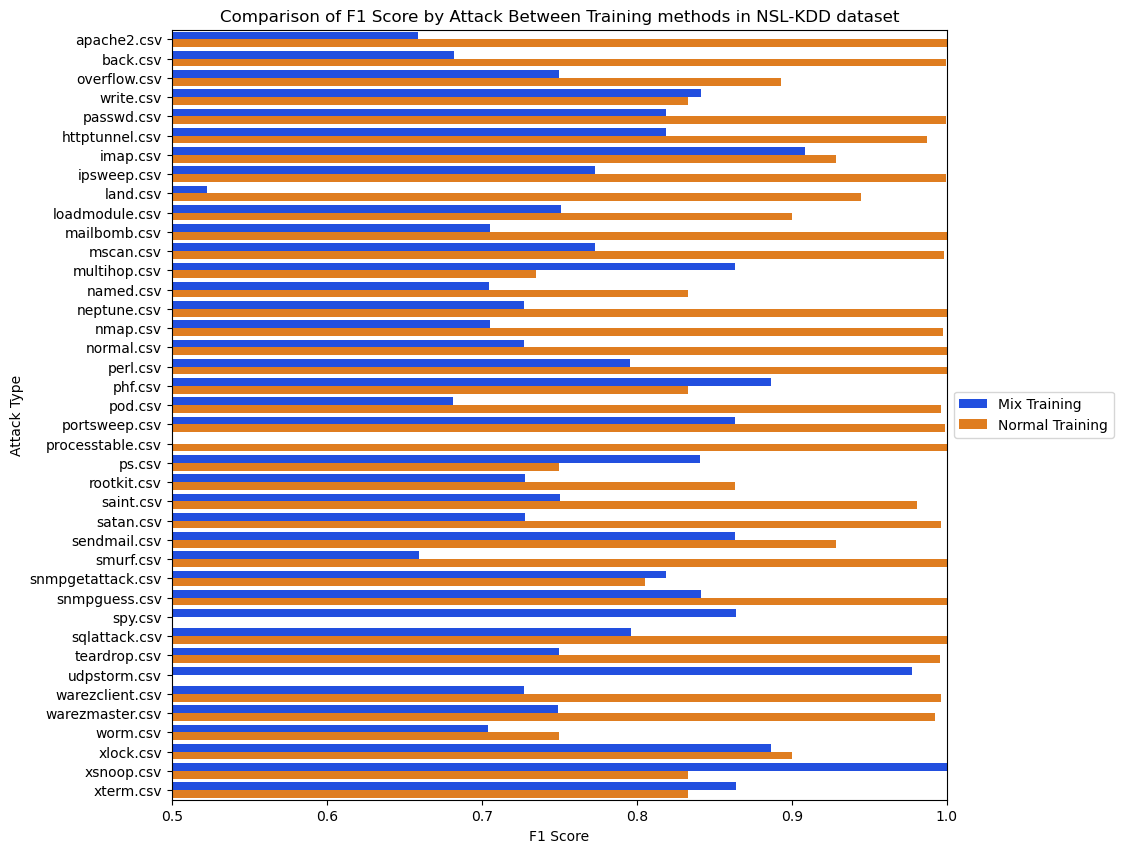

In [47]:

# Function to normalize f1 values
def normalize_f1(df, min_val, max_val):
    df['normalized_f1'] = 0.5 + (df['f1'] - min_val) * (0.5 / (max_val - min_val))
    return df

# Find min and max values for the 'f1' column normalization
min_f1_df1, max_f1_df1 = df1['f1'].min(), df1['f1'].max()
min_f1_df2, max_f1_df2 = df2['f1'].min(), df2['f1'].max()

# Normalize the 'f1' values for both datasets
df1 = normalize_f1(df1, min_f1_df1, max_f1_df1)
df2 = normalize_f1(df2, min_f1_df2, max_f1_df2)

# Add the 'Dataset' column to distinguish between the two datasets
df1['Dataset'] = 'Mix Training'
df2['Dataset'] = 'Normal Training'

# Create a combined dataset for 'f1' scores
combined_df_f1 = pd.concat([df1[['attack', 'normalized_f1', 'Dataset']], 
                            df2[['attack', 'normalized_f1', 'Dataset']]])

# Rename columns for clarity in the plot
combined_df_f1.rename(columns={'normalized_f1': 'F1 Score', 'Dataset': 'Dataset'}, inplace=True)

# Plotting with Seaborn for 'f1' scores
plt.figure(figsize=(10, 10))
sns.barplot(x='F1 Score', y='attack', hue='Dataset', data=combined_df_f1, palette='bright')
plt.title('Comparison of F1 Score by Attack Between Training methods in NSL-KDD dataset')
plt.xlabel('F1 Score')
plt.ylabel('Attack Type')
plt.xlim(0.5, 1.0)  # Adjusting the x-axis to start from 0.5 to 1.0
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# CIC-IDS2017

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
os.chdir("C:\\Users\\Kotani Lab\\Desktop\\ML_senior_project\\ML-Based-Adaptive-Cybersecurity-Incident-Detection\\Code_and_model\\")

# Load the datasets
df2 = pd.read_csv('bestmodel_label_cic.csv')
df1 = pd.read_csv('bestmodel_mix_cic.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.drop(['Unnamed: 0'], axis=1, inplace=True)
# Function to preprocess 'attack' column
def preprocess_attack_column(df):
    df['attack'] = df['attack'].apply(lambda x: x.split('_')[0])
    return df

# Preprocess both datasets
df1 = preprocess_attack_column(df1)
df2 = preprocess_attack_column(df2)


In [33]:
df1

,attack,model,accuracy,f1,normalized_accuracy,Dataset
0,Bot.csv,DecisionTree,0.999274,0.998403,1.00,Mix Training
1,DDoS.csv,DecisionTree,0.999271,0.998397,0.70,Mix Training
2,DoS GoldenEye.csv,DecisionTree,0.999271,0.998397,0.72,Mix Training
3,DoS Hulk.csv,DecisionTree,0.999273,0.998400,0.86,Mix Training
4,DoS Slowhttptest.csv,DecisionTree,0.999274,0.998403,0.98,Mix Training
5,DoS slowloris.csv,DecisionTree,0.999272,0.998399,0.82,Mix Training
6,FTP-Patator.csv,DecisionTree,0.999273,0.998400,0.86,Mix Training
7,Heartbleed.csv,DecisionTree,0.999274,0.998402,0.96,Mix Training
8,Infiltration.csv,DecisionTree,0.999272,0.998399,0.82,Mix Training
9,PortScan.csv,DecisionTree,0.999273,0.998401,0.90,Mix Training


In [34]:
df2

,attack,model,accuracy,f1,normalized_accuracy,Dataset
0,Bot.csv,DecisionTree,0.999929,0.969922,0.961483,Normal Training
1,DDoS.csv,DecisionTree,0.999999,0.999992,0.999350,Normal Training
2,DoS GoldenEye.csv,ExtraTrees,0.999997,0.998704,0.998599,Normal Training
3,DoS Hulk.csv,DecisionTree,0.999794,0.998972,0.888839,Normal Training
4,DoS Slowhttptest.csv,DecisionTree,0.999994,0.999166,0.996925,Normal Training
5,DoS slowloris.csv,DecisionTree,0.999998,0.999710,0.998882,Normal Training
6,FTP-Patator.csv,ExtraTrees,0.999975,0.997411,0.986325,Normal Training
7,Heartbleed.csv,ExtraTrees,1.000000,1.000000,1.000000,Normal Training
8,Infiltration.csv,ExtraTrees,1.000000,1.000000,1.000000,Normal Training
9,PortScan.csv,DecisionTree,0.999444,0.996511,0.700000,Normal Training


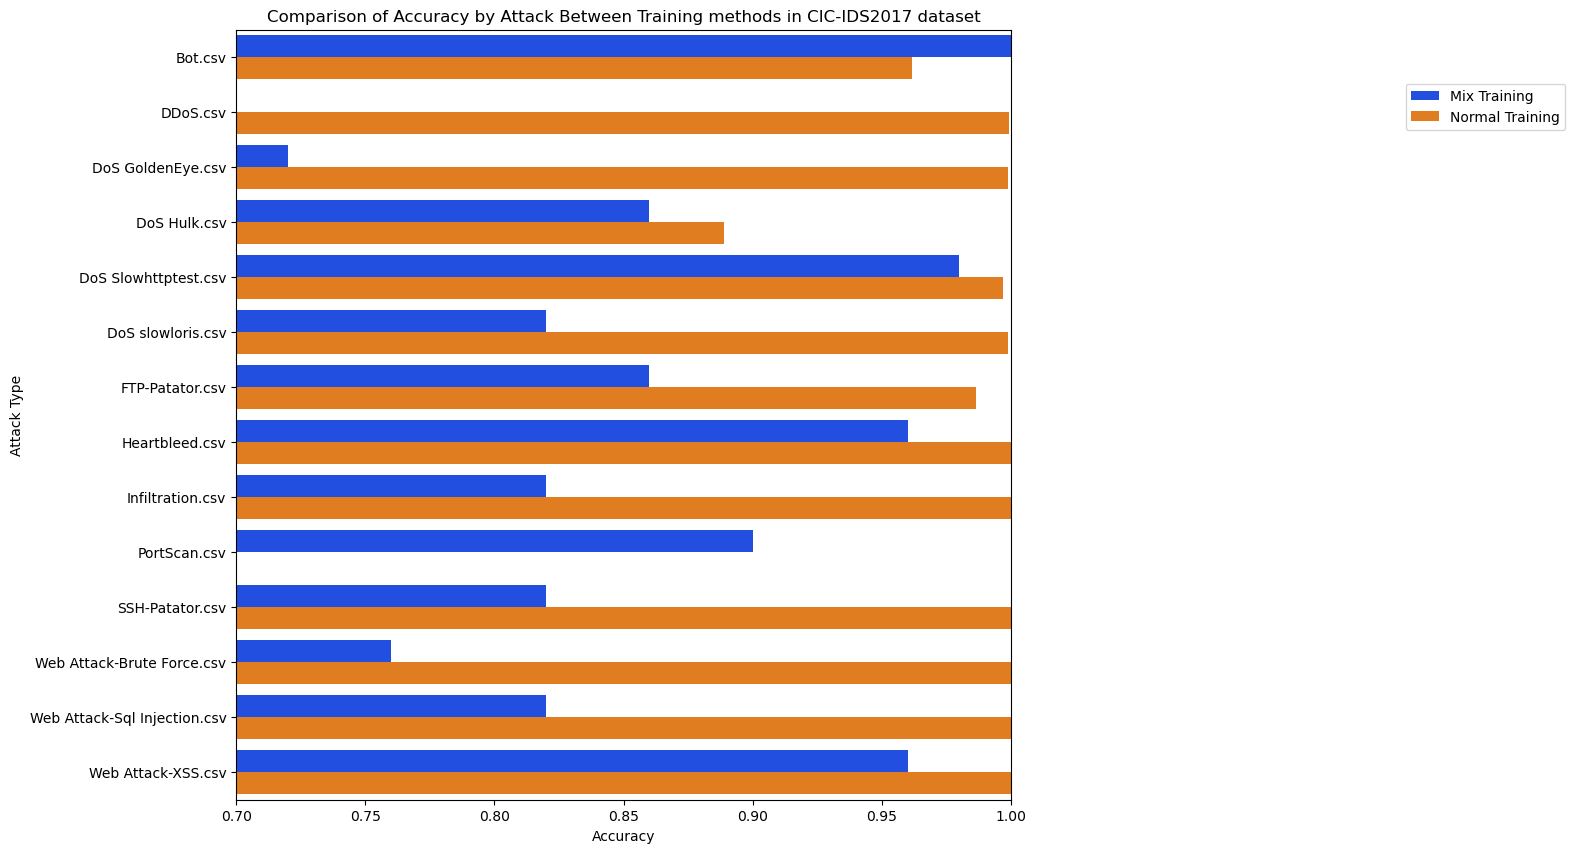

In [32]:
# Function to normalize accuracy values
def normalize_accuracy(df, min_val, max_val):
    """ Normalize the accuracy to fit the new scale [0.8, 1.0] """
    new_min, new_max = 0.7, 1.0
    df['normalized_accuracy'] = new_min + (df['accuracy'] - min_val) * (new_max - new_min) / (max_val - min_val)
    return df

# Find min and max values for normalization
min_val_df1, max_val_df1 = df1['accuracy'].min(), df1['accuracy'].max()
min_val_df2, max_val_df2 = df2['accuracy'].min(), df2['accuracy'].max()

# Normalize the accuracy values for both datasets
df1 = normalize_accuracy(df1, min_val_df1, max_val_df1)
df2 = normalize_accuracy(df2, min_val_df2, max_val_df2)

# Create a combined dataset with a new column to distinguish between the two datasets
df1['Dataset'] = 'Mix Training'
df2['Dataset'] = 'Normal Training'

# Combine the datasets
combined_df = pd.concat([df1[['attack', 'normalized_accuracy', 'Dataset']], 
                         df2[['attack', 'normalized_accuracy', 'Dataset']]])

# Rename columns for clarity in the plot
combined_df.rename(columns={'normalized_accuracy': 'Accuracy', 'Dataset': 'Dataset'}, inplace=True)

# Plotting with Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x='Accuracy', y='attack', hue='Dataset', data=combined_df, palette='bright')
plt.title('Comparison of Accuracy by Attack Between Training methods in CIC-IDS2017 dataset')
plt.xlabel('Accuracy')
plt.ylabel('Attack Type')
plt.xlim(0.7, 1.0)  # Adjusting the x-axis to start from 0.8 to 1.0
# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.9))
plt.savefig('./cic_com.png')
plt.show()

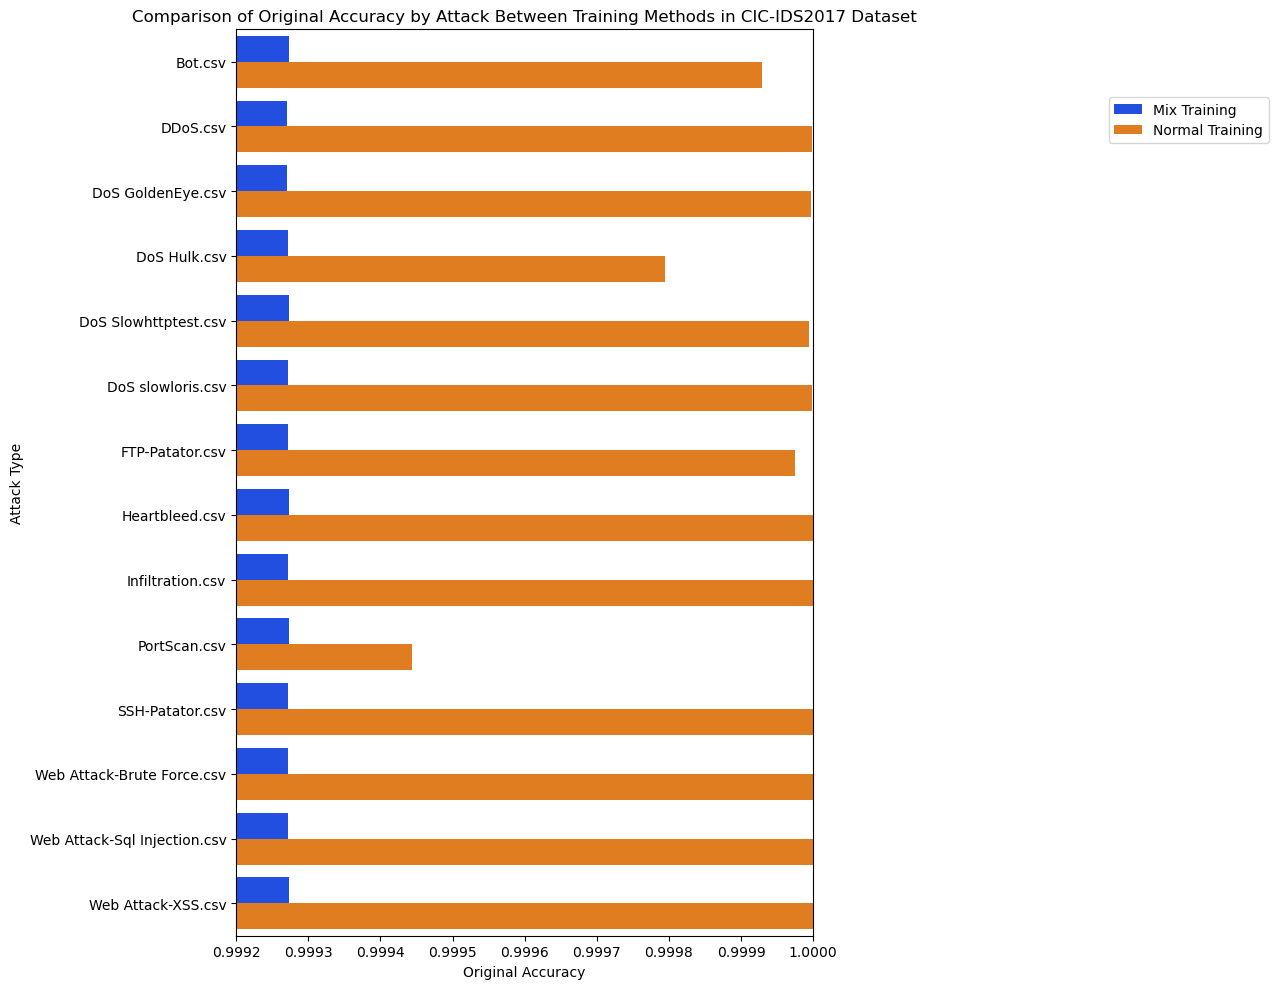

In [61]:
# Plotting the original data with the original scale starting from 0
# Add a column to distinguish between the two datasets


# Create a combined dataset with a new column to distinguish between the two datasets
df1['Dataset'] = 'Mix Training'
df2['Dataset'] = 'Normal Training'

# Combine the datasets
df = pd.concat([df1[['attack', 'accuracy', 'Dataset']], 
                         df2[['attack', 'accuracy', 'Dataset']]])

plt.figure(figsize=(10, 10))
sns.barplot(x='accuracy', y='attack', hue='Dataset', data=df, palette='bright')
plt.title('Comparison of Original Accuracy by Attack Between Training Methods in CIC-IDS2017 Dataset')
plt.xlabel('Original Accuracy')
plt.ylabel('Attack Type')
plt.xlim(0.9992, 1.0)  # Adjusting the x-axis to start from 0 to 1.0
# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()  # Adjust layout to fit everything properly
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.9))
plt.show()


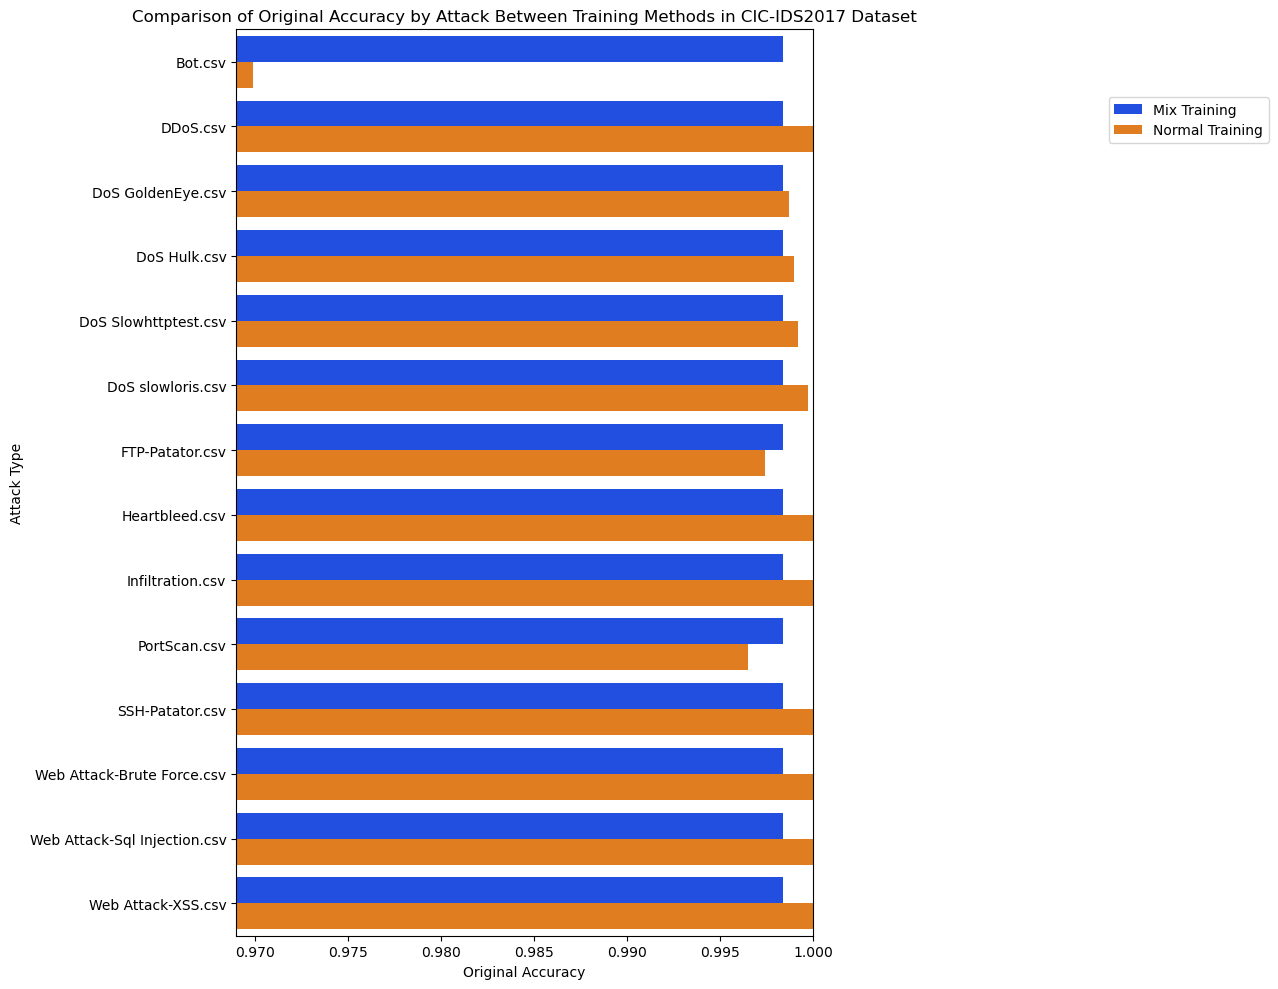

In [62]:
# Plotting the original data with the original scale starting from 0
# Add a column to distinguish between the two datasets


# Create a combined dataset with a new column to distinguish between the two datasets
df1['Dataset'] = 'Mix Training'
df2['Dataset'] = 'Normal Training'

# Combine the datasets
df = pd.concat([df1[['attack', 'f1', 'Dataset']], 
                         df2[['attack', 'f1', 'Dataset']]])

plt.figure(figsize=(10, 10))
sns.barplot(x='f1', y='attack', hue='Dataset', data=df, palette='bright')
plt.title('Comparison of Original Accuracy by Attack Between Training Methods in CIC-IDS2017 Dataset')
plt.xlabel('Original Accuracy')
plt.ylabel('Attack Type')
plt.xlim(0.969, 1.0)  # Adjusting the x-axis to start from 0 to 1.0
# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()  # Adjust layout to fit everything properly
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.9))
plt.show()
